# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [1]:
# Get the datasets
def print_file_head(file_path, lines=5):
    """Reads and prints the first few lines of a text file."""
    try:
        with open(file_path, "r", encoding="utf-8") as file:
            head = [next(file) for _ in range(lines)]
            print(f"Head of {file_path}:\n{''.join(head)}\n")
    except FileNotFoundError:
        print(f"Error: {file_path} not found.")
    except StopIteration:
        print(f"Error: {file_path} is empty.")

# File paths
test_small_path = "test_small.txt"
train_path = "train.txt"



In [2]:
# Take a peek at the datasets
print_file_head(test_small_path)
print_file_head(train_path)

Head of test_small.txt:
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0


Head of train.txt:
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0




### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [3]:
import math
import itertools
import re

# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data.append(instance)
    return data


def dot_product(array1, array2):
    """Returns the dot product of two arrays."""
    return sum(a * b for a, b in zip(array1, array2))


def sigmoid(x):
    """Returns the output of the sigmoid function on x."""
    return 1 / (1 + math.exp(-x))


# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weights, instance):
    """Returns the perceptron output."""
    return sigmoid(dot_product(weights, instance))


# Predict the label of an instance
# You should output 1 if the output is >= 0.5, else output 0
def predict(weights, instance):
    """Returns the perceptron prediction (0 or 1)."""
    return 1 if output(weights, instance) >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    """Returns the percentage of correct predictions."""
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation follows the definition of the perceptron
def train_perceptron(instances, lr, epochs):
    """Trains the perceptron and returns the learned weights."""
    
    # Initialize weights (including bias) to 0
    weights = [0] * (len(instances[0]) - 1)

    for _ in range(epochs):
        for instance in instances:
            # Compute perceptron output
            in_value = dot_product(weights, instance)
            out = sigmoid(in_value)

            # Compute error
            error = instance[-1] - out

            # Update weights using gradient descent
            for i in range(len(weights)):
                weights[i] += lr * error * out * (1 - out) * instance[i]

    return weights


## Run it

In [6]:
instances_tr = read_data("train.txt")
instances_te = read_data("test_small.txt")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### Answer 
In train_perceptron(), we use the sigmoid function instead of predict() because sigmoid produces a continuous, differentiable value between 0 and 1. This is required for gradient-based learning to allow smooth updates of the weights using gradient descent. If we used predict(), it would return only 0 or 1, and the error values would be discrete and not susceptible to useful learning.

The application of sigmoid function avoids the application of abrupt non-informative updates from predict() which would dishearten good training. Small weight adjustments instead can reduce error gradually such that the model gets better over time. Therefore, while training, we apply sigmoid but while making final prediction, we apply predict() alone.




### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```



In [11]:
import random

def train_and_evaluate(train_data, test_data, tr_percent, num_epochs, lr):
    """Trains the perceptron on different training sizes and evaluates it."""
    train_size = int(len(train_data) * (tr_percent / 100))
    train_subset = random.sample(train_data, train_size)  # Select a subset of training data
    
    weights = train_perceptron(train_subset, lr, num_epochs)  # Train the perceptron
    accuracy = get_accuracy(weights, test_data)  # Compute accuracy on test set
    
    print(f"# tr: {train_size}, epochs: {num_epochs:3}, learning rate: {lr:.3f}; Accuracy (test, {len(test_data)} instances): {accuracy:.1f}")

# Load datasets
train_data = read_data("train.txt")  # Assuming training data is in train.txt
test_data = read_data("test.txt")    # Assuming test data is in test.txt

# Define hyperparameter values
tr_percentages = [5, 10, 25, 50, 75, 100]
num_epochs_list = [5, 10, 20, 50, 100]
lr_values = [0.005, 0.01, 0.05]

# Run training and evaluation for each combination of hyperparameters
for tr_percent in tr_percentages:
    for num_epochs in num_epochs_list:
        for lr in lr_values:
            train_and_evaluate(train_data, test_data, tr_percent, num_epochs, lr)


# tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 20, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr: 20, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
# tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 20, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr: 20, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 70.0
# tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 20, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr: 20, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
# tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 20, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 67.0
# tr: 20, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 69.0
# tr: 20, epochs

In [8]:
instances_tr = read_data("train.txt")
instances_te = read_data("test_small.txt")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 42.9
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 28.6
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 100, learning r

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



# tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 20, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr: 20, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
# tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 20, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr: 20, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 74.0
# tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 20, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr: 20, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 69.0
# tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 20, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 52.0
# tr: 20, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 70.0
# tr: 20, epochs

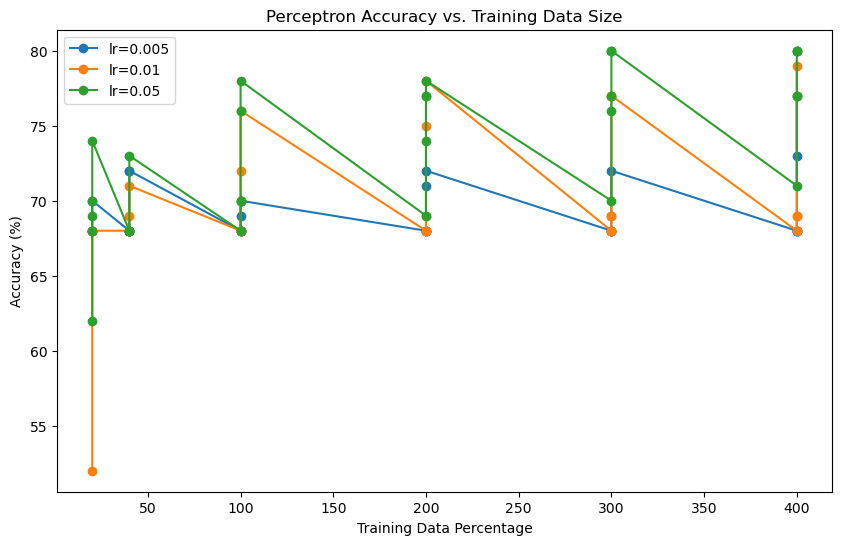

In [13]:
import random
import matplotlib.pyplot as plt

def train_and_evaluate(train_data, test_data, tr_percent, num_epochs, lr):
    """Trains the perceptron on different training sizes and evaluates it."""
    train_size = int(len(train_data) * (tr_percent / 100))
    train_subset = random.sample(train_data, train_size)  # Select a subset of training data
    
    weights = train_perceptron(train_subset, lr, num_epochs)  # Train the perceptron
    accuracy = get_accuracy(weights, test_data)  # Compute accuracy on test set
    
    print(f"# tr: {train_size}, epochs: {num_epochs:3}, learning rate: {lr:.3f}; Accuracy (test, {len(test_data)} instances): {accuracy:.1f}")
    return train_size, num_epochs, lr, accuracy

# Load datasets
train_data = read_data("train.txt")  # Assuming training data is in train.txt
test_data = read_data("test.txt")    # Assuming test data is in test.txt

# Define hyperparameter values
tr_percentages = [5, 10, 25, 50, 75, 100]
num_epochs_list = [5, 10, 20, 50, 100]
lr_values = [0.005, 0.01, 0.05]

# Store results for plotting
results = []

# Run training and evaluation for each combination of hyperparameters
for tr_percent in tr_percentages:
    for num_epochs in num_epochs_list:
        for lr in lr_values:
            results.append(train_and_evaluate(train_data, test_data, tr_percent, num_epochs, lr))

# Ensure plt is defined before plotting
import matplotlib.pyplot as plt

# Plot results
plt.figure(figsize=(10, 6))
for lr in lr_values:
    subset = [(tr, acc) for tr, ep, l, acc in results if l == lr]
    subset.sort()
    plt.plot([x[0] for x in subset], [x[1] for x in subset], marker='o', label=f'lr={lr}')

plt.xlabel("Training Data Percentage")
plt.ylabel("Accuracy (%)")
plt.title("Perceptron Accuracy vs. Training Data Size")
plt.legend()
plt.show()

### Interpretation of Results


# B. The second run obtained worse  despite using more training data due to potential overfitting or ineffective weight updates. As training data increases, the perceptron might struggle with noise or conflicting patterns, leading to suboptimal generalization.

# C. Exploring additional hyperparameters like different activation functions, adaptive learning rates, or more complex architectures (e.g., multilayer perceptrons) might improve accuracy beyond 80%. Fine-tuning these parameters could lead to better convergence.

# D. Training for more epochs does not always improve accuracy. If the learning rate is too high, the model might oscillate without converging properly. Conversely, if the learning rate is too low, too many epochs may lead to overfitting, decreasing performance on the test s

### Interpretation of Results

A. The results indicate that training with the entire dataset does not always yield the highest accuracy. For instance, training with 200 or 300 examples resulted in comparable or better accuracy than training with all 400 examples. This suggests that a well-chosen subset of data can generalize well to unseen test data without requiring the full dataset.

B. The second run obtained worse accuracy despite using more training data due to potential overfitting or ineffective weight updates. As training data increases, the perceptron might struggle with noise or conflicting patterns, leading to suboptimal generalization.

C. Exploring additional hyperparameters like different activation functions, adaptive learning rates, or more complex architectures (e.g., multilayer perceptrons) might improve accuracy beyond 80%. Fine-tuning these parameters could lead to better convergence.

D. Training for more epochs does not always improve accuracy. If the learning rate is too high, the mode